## Introduction

Located in the north coast of Portugal and famous for its food, wine and beaches, Porto has been growing as one of the most attractive destinations worldwide. This has not only been recognized by the prizes own (World Travel Awards: https://www.worldtravelawards.com/profile-34429-porto-tourism) but also by the increasing the number of tourist arrivals - grew over 70% from 2013 to 2019.

This tendency has been followed by new investments in Porto and in deverse sectors - from real estate to the opening of subsidiaries / offices of many multinational companies in the city.

Having said that, in this section we will examine the different municipalities in Porto and select the best locations to open an Italian restaurant.

## Data overview

In order to analyze the best counties to open the restaurant, we will start by retrieving their respective latitudes and longitudes from https://simplemaps.com/data/pt-cities. Through this file, we can also get the number of people living in each municipality, which can be a good indicator for the market size. This will be done by reading the csv file and cleaning the data.

As we will be able to see, Porto is composed by 18 municipalities and has roughly 2 million inhabitants. 

The second step, will be to get the Venues data in each country, by using the Foursquare API.

In [17]:
import pandas as pd
import requests
import numpy as np
import folium

In [18]:
pt = pd.read_csv(r'C:\Users\nunos\Downloads\pt.csv')

pt.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Lisbon,38.7452,-9.16040,Portugal,PT,Lisboa,primary,506654.0,506654.0
1,Vila Nova de Gaia,41.1333,-8.61670,Portugal,PT,Porto,minor,302295.0,302295.0
2,Porto,41.1495,-8.61080,Portugal,PT,Porto,admin,237591.0,237591.0
3,Braga,41.5333,-8.41670,Portugal,PT,Braga,admin,181494.0,181494.0
4,Matosinhos,41.1830,-8.67977,Portugal,PT,Porto,minor,175478.0,175478.0


In [19]:
# The first step will be to drop the uncessary columns
pt.drop(columns = ['iso2', 'country', 'population_proper'], inplace = True)

# In the second step we will rename the columns for easier visualization
pt.rename(columns = {'city': 'City',
                    'lat': 'Latitude',
                    'lng': 'Longitude',
                    'admin_name': 'District',
                    'capital': 'City type',
                    'population': 'Population'
                    },
         inplace = True
         )

# Check the dataframe
pt.head()

,City,Latitude,Longitude,District,City type,Population
0,Lisbon,38.7452,-9.16040,Lisboa,primary,506654.0
1,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0
2,Porto,41.1495,-8.61080,Porto,admin,237591.0
3,Braga,41.5333,-8.41670,Braga,admin,181494.0
4,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0


In [20]:
# Retrieve only the cities location in Porto district

pt_porto = pt.loc[pt['District'] == 'Porto']

# Checking our dataset

pt_porto.head()

,City,Latitude,Longitude,District,City type,Population
1,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0
2,Porto,41.1495,-8.61080,Porto,admin,237591.0
4,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0
8,Gondomar,41.1500,-8.53330,Porto,minor,168027.0
13,Maia,41.2333,-8.61670,Porto,minor,135306.0


In [21]:
pt_porto.set_index('City')

,Latitude,Longitude,District,City type,Population
City,,,,,
Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0
Porto,41.1495,-8.61080,Porto,admin,237591.0
Matosinhos,41.1830,-8.67977,Porto,minor,175478.0
Gondomar,41.1500,-8.53330,Porto,minor,168027.0
Maia,41.2333,-8.61670,Porto,minor,135306.0
Valongo,41.1833,-8.50000,Porto,minor,93858.0
Paredes,41.2000,-8.33330,Porto,minor,86854.0
Vila do Conde,41.3500,-8.75000,Porto,minor,79533.0
Penafiel,41.2000,-8.28330,Porto,minor,72265.0


In [22]:
# Let's drop the observations that have NaN

pt_porto = pt_porto.dropna(subset = ['City type']).reset_index(drop = True)

In [23]:

pt_porto

,City,Latitude,Longitude,District,City type,Population
0,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0
1,Porto,41.1495,-8.61080,Porto,admin,237591.0
2,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0
3,Gondomar,41.1500,-8.53330,Porto,minor,168027.0
4,Maia,41.2333,-8.61670,Porto,minor,135306.0
5,Valongo,41.1833,-8.50000,Porto,minor,93858.0
6,Paredes,41.2000,-8.33330,Porto,minor,86854.0
7,Vila do Conde,41.3500,-8.75000,Porto,minor,79533.0
8,Penafiel,41.2000,-8.28330,Porto,minor,72265.0
9,Póvoa de Varzim,41.3916,-8.75710,Porto,minor,63408.0


In [24]:
# Defining Foursquare credentials

CLIENT_ID = 'WZ3OLOAKPUVAJ1D04OBRIHNRKZ5BLSPY3ERTO33S0IRPNX0M' # your Foursquare ID
CLIENT_SECRET = 'YE1C1L3KVYLUDUW0HGLJIRZF2JV12G13EVKIAXGP4S1VMUMR' # your Foursquare Secret
VERSION = '20210515'

In [26]:
porto_map = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(pt_porto['Latitude'], pt_porto['Longitude'], pt_porto['City']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(porto_map)  
    
porto_map

In [27]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=1000
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
venues_porto = getNearbyVenues(names = pt_porto['City'],
                                   latitudes = pt_porto['Latitude'],
                                   longitudes = pt_porto['Longitude']
                                  )

Vila Nova de Gaia
Porto
Matosinhos
Gondomar
Maia
Valongo
Paredes
Vila do Conde
Penafiel
Póvoa de Varzim
Felgueiras
Paços de Ferreira
Amarante
Marco de Canavezes
Lousada
Trofa
Baião
Santo Tirso


In [30]:
# Get the venues for each city

venues_porto.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vila Nova de Gaia,41.1333,-8.6167,Caves Taylor's,41.134341,-8.614405,Winery
1,Vila Nova de Gaia,41.1333,-8.6167,Croft Port,41.134585,-8.614832,Wine Shop
2,Vila Nova de Gaia,41.1333,-8.6167,The Yeatman,41.133652,-8.612981,Hotel
3,Vila Nova de Gaia,41.1333,-8.6167,Yeatman Restaurant,41.133967,-8.613222,Restaurant
4,Vila Nova de Gaia,41.1333,-8.6167,7groaster,41.136979,-8.613956,Café


In [31]:
# Get the total number of venues by city

venues_porto.groupby(by = 'Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amarante,34,34,34,34,34,34
Baião,4,4,4,4,4,4
Felgueiras,4,4,4,4,4,4
Gondomar,8,8,8,8,8,8
Lousada,11,11,11,11,11,11
Maia,51,51,51,51,51,51
Marco de Canavezes,31,31,31,31,31,31
Matosinhos,52,52,52,52,52,52
Paredes,18,18,18,18,18,18


In [33]:
# One hot enconding -> Converting venues' categories into dummy variables

porto_1h = pd.get_dummies(venues_porto[['Venue Category']], prefix = '', prefix_sep = '')
porto_1h.head()

,Art Gallery,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Bistro,...,Theater,Theme Park,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Add the City it as our first column

porto_1h.insert(loc=0, column = 'City', value = venues_porto['Neighborhood'])
porto_1h.head()

,City,Art Gallery,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,...,Theater,Theme Park,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Vila Nova de Gaia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Vila Nova de Gaia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Vila Nova de Gaia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vila Nova de Gaia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vila Nova de Gaia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Now let's group it by neighborhood

porto_1h = porto_1h.groupby('City').mean().reset_index()
porto_1h

,City,Art Gallery,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,...,Theater,Theme Park,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Amarante,0.000000,0.00,0.000000,0.029412,0.088235,0.117647,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
1,Baião,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
2,Felgueiras,0.000000,0.00,0.000000,0.000000,0.500000,0.250000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
3,Gondomar,0.000000,0.00,0.000000,0.125000,0.125000,0.125000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
4,Lousada,0.000000,0.00,0.000000,0.000000,0.272727,0.181818,0.000000,0.00,0.000000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
5,Maia,0.000000,0.00,0.000000,0.019608,0.117647,0.019608,0.000000,0.00,0.000000,...,0.019608,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
6,Marco de Canavezes,0.000000,0.00,0.032258,0.000000,0.096774,0.129032,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.032258,0.000000,0.00,0.000000,0.00,0.00,0.00
7,Matosinhos,0.000000,0.00,0.000000,0.019231,0.134615,0.019231,0.000000,0.00,0.019231,...,0.000000,0.038462,0.000000,0.000000,0.038462,0.00,0.000000,0.00,0.00,0.00
8,Paredes,0.000000,0.00,0.000000,0.000000,0.111111,0.055556,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.000000,0.00,0.00,0.00
9,Paços de Ferreira,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00


In [38]:
# Create a function to retrieve the most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
# Get the top 10 venue categories in each Neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = porto_1h['City']

for ind in np.arange(porto_1h.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(porto_1h.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amarante,Restaurant,Bar,Bakery,Portuguese Restaurant,Café,Coffee Shop,Plaza,Supermarket,Lounge,Food
1,Baião,Restaurant,Ice Cream Shop,Portuguese Restaurant,Bakery,Food Court,Cupcake Shop,Dessert Shop,Dutch Restaurant,Eastern European Restaurant,Electronics Store
2,Felgueiras,Bakery,Restaurant,Bar,Garden,Cupcake Shop,Dessert Shop,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant
3,Gondomar,Coffee Shop,Bar,Café,Seafood Restaurant,Scenic Lookout,Supermarket,Bakery,BBQ Joint,Eastern European Restaurant,Food Court
4,Lousada,Bakery,Bar,Restaurant,Café,Gym / Fitness Center,Theater,Food Court,Portuguese Restaurant,Dutch Restaurant,Food


### Clustering

In [40]:
from sklearn.cluster import KMeans

In [41]:
# Defining the number of clusters
kclusters = 5

porto_clusters = porto_1h.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(porto_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 0, 3, 0, 2, 2, 2, 2, 1])

In [42]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

porto_merged = pt_porto

In [43]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
porto_merged = porto_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

porto_merged.head()

,City,Latitude,Longitude,District,City type,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0,2,Portuguese Restaurant,Restaurant,Bar,Café,Wine Bar,Winery,Italian Restaurant,Hotel,Plaza,Scenic Lookout
1,Porto,41.1495,-8.61080,Porto,admin,237591.0,2,Portuguese Restaurant,Hostel,Restaurant,Bar,Beer Bar,Plaza,Café,Ice Cream Shop,Tapas Restaurant,Brewery
2,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0,2,Bakery,Café,Seafood Restaurant,Restaurant,Sushi Restaurant,Portuguese Restaurant,Italian Restaurant,Tapas Restaurant,Theme Park,Vegetarian / Vegan Restaurant
3,Gondomar,41.1500,-8.53330,Porto,minor,168027.0,3,Coffee Shop,Bar,Café,Seafood Restaurant,Scenic Lookout,Supermarket,Bakery,BBQ Joint,Eastern European Restaurant,Food Court
4,Maia,41.2333,-8.61670,Porto,minor,135306.0,2,Café,Bakery,Portuguese Restaurant,Coffee Shop,Supermarket,Restaurant,Hotel,Pizza Place,Sushi Restaurant,Gas Station


### Maping

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
from geopy.geocoders import Nominatim 

Solving environment: ...working... done

# All requested packages already installed.



In [12]:
address = 'Porto'

geolocator = Nominatim(user_agent="porto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Porto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Porto are 41.1494512, -8.6107884.


In [44]:
# Maping the clusters

latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(porto_merged['Latitude'], porto_merged['Longitude'], porto_merged['City'], porto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
porto_merged.sort_values(by = 'Population', ascending = False)

,City,Latitude,Longitude,District,City type,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0,2,Portuguese Restaurant,Restaurant,Bar,Café,Wine Bar,Winery,Italian Restaurant,Hotel,Plaza,Scenic Lookout
1,Porto,41.1495,-8.61080,Porto,admin,237591.0,2,Portuguese Restaurant,Hostel,Restaurant,Bar,Beer Bar,Plaza,Café,Ice Cream Shop,Tapas Restaurant,Brewery
2,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0,2,Bakery,Café,Seafood Restaurant,Restaurant,Sushi Restaurant,Portuguese Restaurant,Italian Restaurant,Tapas Restaurant,Theme Park,Vegetarian / Vegan Restaurant
3,Gondomar,41.1500,-8.53330,Porto,minor,168027.0,3,Coffee Shop,Bar,Café,Seafood Restaurant,Scenic Lookout,Supermarket,Bakery,BBQ Joint,Eastern European Restaurant,Food Court
4,Maia,41.2333,-8.61670,Porto,minor,135306.0,2,Café,Bakery,Portuguese Restaurant,Coffee Shop,Supermarket,Restaurant,Hotel,Pizza Place,Sushi Restaurant,Gas Station
5,Valongo,41.1833,-8.50000,Porto,minor,93858.0,1,Café,Snack Place,Tapas Restaurant,Portuguese Restaurant,Tennis Court,Shopping Mall,Park,Grocery Store,Gym / Fitness Center,Bar
6,Paredes,41.2000,-8.33330,Porto,minor,86854.0,2,Portuguese Restaurant,Bakery,Café,Restaurant,Lounge,Cocktail Bar,Electronics Store,Snack Place,Burger Joint,Pharmacy
7,Vila do Conde,41.3500,-8.75000,Porto,minor,79533.0,2,Portuguese Restaurant,Café,Bar,Beach,Seafood Restaurant,Bakery,Surf Spot,Coffee Shop,Restaurant,Plaza
8,Penafiel,41.2000,-8.28330,Porto,minor,72265.0,2,Tapas Restaurant,Park,Bakery,Bar,Pizza Place,Yoga Studio,Gym,Multiplex,Coffee Shop,Snack Place
9,Póvoa de Varzim,41.3916,-8.75710,Porto,minor,63408.0,2,Supermarket,Portuguese Restaurant,BBQ Joint,Bakery,Restaurant,Food,Plaza,Park,Electronics Store,Chinese Restaurant


## EXPLORATORY ANALYSIS

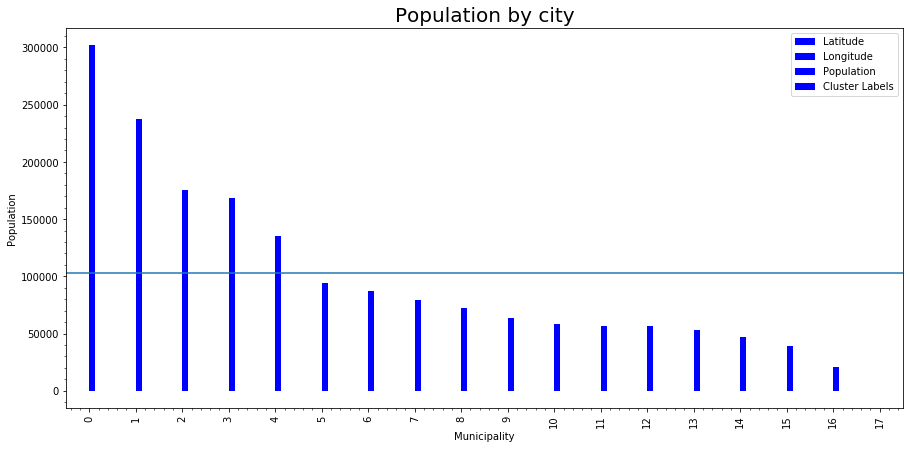

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

porto_merged.plot(kind = 'bar', ax = ax, color = 'blue', figsize = (15, 7))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Municipality")
ax.set_ylabel("Population")
ax.set_title(("Population by city"), fontsize=20)

mean = porto_merged["Population"].mean()
ax.axhline(mean)

Text(0, 0.5, 'Population')

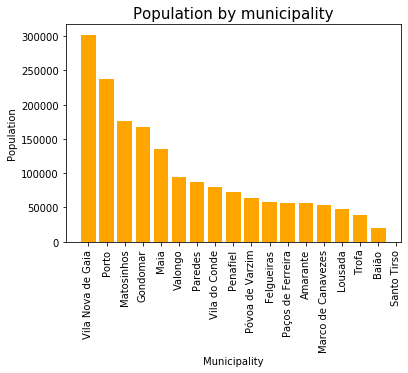

In [104]:

ax = plt.bar(porto_merged.City, porto_merged.Population, color = 'orange')
ax = plt.xticks(rotation = 'vertical')

plt.title('Population by municipality', fontsize = 15)
plt.xlabel('Municipality')
plt.ylabel('Population')


#### Number of venues

In [138]:
venues_number = venues_porto.groupby(by = 'Neighborhood').count().sort_values('Venue', ascending = False)
venues_number.rename(columns = {'Neighborhood': 'City'}, inplace = True)
venues_number.reset_index(inplace = True)
venues_number.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vila Nova de Gaia,100,100,100,100,100,100
1,Porto,100,100,100,100,100,100
2,Vila do Conde,55,55,55,55,55,55
3,Matosinhos,52,52,52,52,52,52
4,Maia,51,51,51,51,51,51


Text(0, 0.5, 'Number of venues')

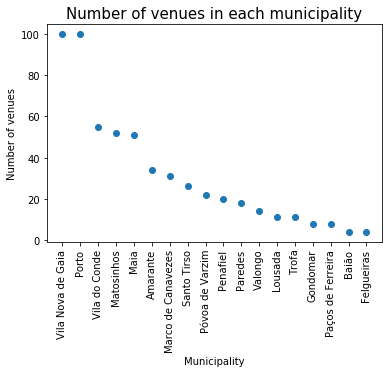

In [132]:
plt.scatter(venues_number['Neighborhood'], venues_number['Venue'])
ax = plt.xticks(rotation = 'vertical')

plt.title('Number of venues in each municipality', fontsize = 15)
plt.xlabel('Municipality')
plt.ylabel('Number of venues')

0               Amarante
1                  Baião
2             Felgueiras
3               Gondomar
4                Lousada
5                   Maia
6     Marco de Canavezes
7             Matosinhos
8                Paredes
9      Paços de Ferreira
10              Penafiel
11                 Porto
12       Póvoa de Varzim
13           Santo Tirso
14                 Trofa
15               Valongo
16     Vila Nova de Gaia
17         Vila do Conde
Name: Neighborhood, dtype: object

In [113]:
venues_number.Venue

Neighborhood
Amarante               34
Baião                   4
Felgueiras              4
Gondomar                8
Lousada                11
Maia                   51
Marco de Canavezes     31
Matosinhos             52
Paredes                18
Paços de Ferreira       8
Penafiel               20
Porto                 100
Póvoa de Varzim        22
Santo Tirso            26
Trofa                  11
Valongo                14
Vila Nova de Gaia     100
Vila do Conde          55
Name: Venue, dtype: int64

In [141]:
porto_merged_complete = porto_merged.join(venues_number.set_index('Neighborhood'), on='City')

In [143]:
porto_merged_complete['Ratio'] = porto_merged_complete['Population'] / porto_merged_complete['Venue']

In [178]:
porto_merged_complete.head(10)

,City,Latitude,Longitude,District,City type,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratio
0,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0,2,Portuguese Restaurant,Restaurant,Bar,...,Hotel,Plaza,Scenic Lookout,100,100,100,100,100,100,3022.950000
1,Porto,41.1495,-8.61080,Porto,admin,237591.0,2,Portuguese Restaurant,Hostel,Restaurant,...,Ice Cream Shop,Tapas Restaurant,Brewery,100,100,100,100,100,100,2375.910000
2,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0,2,Bakery,Café,Seafood Restaurant,...,Tapas Restaurant,Theme Park,Vegetarian / Vegan Restaurant,52,52,52,52,52,52,3374.576923
3,Gondomar,41.1500,-8.53330,Porto,minor,168027.0,3,Coffee Shop,Bar,Café,...,BBQ Joint,Eastern European Restaurant,Food Court,8,8,8,8,8,8,21003.375000
4,Maia,41.2333,-8.61670,Porto,minor,135306.0,2,Café,Bakery,Portuguese Restaurant,...,Pizza Place,Sushi Restaurant,Gas Station,51,51,51,51,51,51,2653.058824
5,Valongo,41.1833,-8.50000,Porto,minor,93858.0,1,Café,Snack Place,Tapas Restaurant,...,Grocery Store,Gym / Fitness Center,Bar,14,14,14,14,14,14,6704.142857
6,Paredes,41.2000,-8.33330,Porto,minor,86854.0,2,Portuguese Restaurant,Bakery,Café,...,Snack Place,Burger Joint,Pharmacy,18,18,18,18,18,18,4825.222222
7,Vila do Conde,41.3500,-8.75000,Porto,minor,79533.0,2,Portuguese Restaurant,Café,Bar,...,Coffee Shop,Restaurant,Plaza,55,55,55,55,55,55,1446.054545
8,Penafiel,41.2000,-8.28330,Porto,minor,72265.0,2,Tapas Restaurant,Park,Bakery,...,Multiplex,Coffee Shop,Snack Place,20,20,20,20,20,20,3613.250000
9,Póvoa de Varzim,41.3916,-8.75710,Porto,minor,63408.0,2,Supermarket,Portuguese Restaurant,BBQ Joint,...,Park,Electronics Store,Chinese Restaurant,22,22,22,22,22,22,2882.181818


In [150]:
pop_above = porto_merged_complete.loc[(porto_merged_complete['Population'] > porto_merged_complete['Population'].mean()) & (porto_merged_complete['Venue'] > 50)].sort_values(by = 'Ratio', ascending = False)
pop_above

,City,Latitude,Longitude,District,City type,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratio
2,Matosinhos,41.1830,-8.67977,Porto,minor,175478.0,2,Bakery,Café,Seafood Restaurant,...,Tapas Restaurant,Theme Park,Vegetarian / Vegan Restaurant,52,52,52,52,52,52,3374.576923
0,Vila Nova de Gaia,41.1333,-8.61670,Porto,minor,302295.0,2,Portuguese Restaurant,Restaurant,Bar,...,Hotel,Plaza,Scenic Lookout,100,100,100,100,100,100,3022.950000
4,Maia,41.2333,-8.61670,Porto,minor,135306.0,2,Café,Bakery,Portuguese Restaurant,...,Pizza Place,Sushi Restaurant,Gas Station,51,51,51,51,51,51,2653.058824
1,Porto,41.1495,-8.61080,Porto,admin,237591.0,2,Portuguese Restaurant,Hostel,Restaurant,...,Ice Cream Shop,Tapas Restaurant,Brewery,100,100,100,100,100,100,2375.910000


(0, 4000)

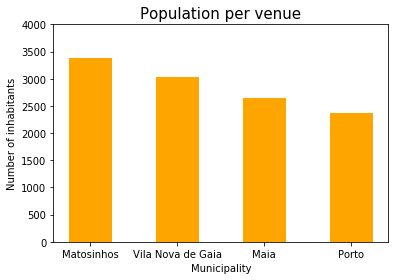

In [176]:
plt.bar(pop_above.City, 
        pop_above.Ratio, 
        align = 'center', 
        color = 'orange',
        width = 0.5
        )

plt.title('Population per venue', fontsize = 15)
plt.xlabel('Municipality')
plt.ylabel('Number of inhabitants')

plt.ylim(0, 4000)

In [177]:
porto_merged_complete.Population.mean()

102684.82352941176

In [186]:
porto_merged_complete[['City', 'Population', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']].sort_values(by = 'Population', ascending = False)

,City,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Vila Nova de Gaia,302295.0,Portuguese Restaurant,Restaurant,Bar,Café,Wine Bar
1,Porto,237591.0,Portuguese Restaurant,Hostel,Restaurant,Bar,Beer Bar
2,Matosinhos,175478.0,Bakery,Café,Seafood Restaurant,Restaurant,Sushi Restaurant
3,Gondomar,168027.0,Coffee Shop,Bar,Café,Seafood Restaurant,Scenic Lookout
4,Maia,135306.0,Café,Bakery,Portuguese Restaurant,Coffee Shop,Supermarket
5,Valongo,93858.0,Café,Snack Place,Tapas Restaurant,Portuguese Restaurant,Tennis Court
6,Paredes,86854.0,Portuguese Restaurant,Bakery,Café,Restaurant,Lounge
7,Vila do Conde,79533.0,Portuguese Restaurant,Café,Bar,Beach,Seafood Restaurant
8,Penafiel,72265.0,Tapas Restaurant,Park,Bakery,Bar,Pizza Place
9,Póvoa de Varzim,63408.0,Supermarket,Portuguese Restaurant,BBQ Joint,Bakery,Restaurant
